# Prepare the data for analysis

In [1]:
import pandas as pd
import numpy as np

def is_int(val):
    try:
        int(val)
        return True
    except ValueError:
        return False

# Load the data
df = pd.read_csv('data/Motor_Vehicle_Collisions_-_Crashes.csv')

# Select only the columns we need
df = df[['CRASH DATE', 'CRASH TIME', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]

# Drop rows with missing values in anything but the last 5 columns
df = df.dropna(subset=df.columns[:-5])

# Drop rows with non-numeric zip codes
df = df[df['ZIP CODE'].apply(is_int)]

# Make all vehicle types uppercase
df[df.columns[-5:]] = df[df.columns[-5:]].apply(lambda x: x.str.upper())

# Drop rows with 'UNKNOWN' in the vehicle type columns
df = df[~df[df.columns[-5:]].isin(['UNKNOWN']).any(axis=1)]

# Drop rows with 'OTHER' in the vehicle type columns
df = df[~df[df.columns[-5:]].isin(['OTHER']).any(axis=1)]

# Get the top 35 vehicle types (ignore the fact that it actually gets top 35)
top_20 = df[df.columns[-5:]].stack().value_counts().head(35).index.tolist()
print(top_20)
# Remove rows with vehicle type 1 not in top 20
df = df[df['VEHICLE TYPE CODE 1'].isin(top_20)]

df = df[df['VEHICLE TYPE CODE 2'].isin(top_20) | df['VEHICLE TYPE CODE 2'].isna()]
df = df[df['VEHICLE TYPE CODE 3'].isin(top_20) | df['VEHICLE TYPE CODE 3'].isna()]
df = df[df['VEHICLE TYPE CODE 4'].isin(top_20) | df['VEHICLE TYPE CODE 4'].isna()]
df = df[df['VEHICLE TYPE CODE 5'].isin(top_20) | df['VEHICLE TYPE CODE 5'].isna()]

# Add severity coefficient
df['SEVERITY'] = (df['NUMBER OF PERSONS INJURED'] / (df['NUMBER OF PERSONS INJURED'] + 5)) + df['NUMBER OF PERSONS KILLED']
#df['SEVERITY'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED'] * 2

# Convert date and time to datetime, in case of errors, set errors='coerce'
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], errors='coerce')

# Drop rows with missing values in date or time
df = df.dropna(subset=['CRASH DATE', 'CRASH TIME'])

# Add day of week
df['DAY OF WEEK'] = df['CRASH DATE'].dt.day_name()

# Add hour of day
df['HOUR OF DAY'] = df['CRASH TIME'].dt.hour

# Add month
df['MONTH'] = df['CRASH DATE'].dt.month_name()

# Add season
df['SEASON'] = df['CRASH DATE'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

vehicle_type_cols = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

df['AMOUNT VEHICLES'] = df[vehicle_type_cols].apply(lambda row: row.count(), axis=1)


df.head(10)

/tmp/ipykernel_27913/2565934712.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Motor_Vehicle_Collisions_-_Crashes.csv')


['SEDAN', 'PASSENGER VEHICLE', 'STATION WAGON/SPORT UTILITY VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'PICK-UP TRUCK', 'VAN', 'BUS', '4 DR SEDAN', 'BOX TRUCK', 'BIKE', 'SMALL COM VEH(4 TIRES) ', 'LARGE COM VEH(6 OR MORE TIRES)', 'BICYCLE', 'LIVERY VEHICLE', 'MOTORCYCLE', 'TRACTOR TRUCK DIESEL', 'AMBULANCE', 'E-BIKE', 'DUMP', 'E-SCOOTER', 'CONVERTIBLE', 'MOPED', 'PK', 'GARBAGE OR REFUSE', 'FLAT BED', 'CARRY ALL', '2 DR SEDAN', 'TRACTOR TRUCK GASOLINE', 'TOW TRUCK / WRECKER', 'FIRE TRUCK', 'MOTORSCOOTER', 'TANKER', 'MOTORBIKE', 'CHASSIS CAB']


/tmp/ipykernel_27913/2565934712.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], errors='coerce')


CRASH DATE          CRASH TIME ZIP CODE   LATITUDE  LONGITUDE  \
3  2021-09-11 2023-12-11 09:35:00  11208.0  40.667202 -73.866500   
7  2021-12-14 2023-12-11 08:17:00  10475.0  40.868160 -73.831480   
8  2021-12-14 2023-12-11 21:10:00  11207.0  40.671720 -73.897100   
9  2021-12-14 2023-12-11 14:58:00  10017.0  40.751440 -73.973970   
11 2021-12-14 2023-12-11 16:50:00  11413.0  40.675884 -73.755770   
14 2021-12-14 2023-12-11 23:10:00  11434.0  40.666840 -73.789410   
15 2021-12-14 2023-12-11 17:58:00  11217.0  40.681580 -73.974630   
16 2021-12-14 2023-12-11 20:03:00  11226.0  40.650680 -73.958810   
18 2021-12-11 2023-12-11 19:43:00  10463.0  40.872620 -73.904686   
20 2021-12-11 2023-12-11 04:45:00  10001.0  40.748917 -73.993546   

    NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
3                         0.0                       0.0   
7                         2.0                       0.0   
8                         0.0                       0.0   
9                         0.0                       0.0   
11                        0.0                       0.0   
14                        2.0                       0.0   
15                        0.0                       0.0   
16                        4.0                       0.0   
18                        1.0                       0.0   
20                        0.0                       0.0   

                    VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
3                                 SEDAN                                  NaN   
7                                 SEDAN                                SEDAN   
8                                 SEDAN                                  NaN   
9                                 SEDAN  STATION WAGON/SPORT UTILITY VEHICLE   
11                                SEDAN  STATION WAGON/SPORT UTILITY VEHICLE   
14                                SEDAN                                SEDAN   
15                               TANKER  STATION WAGON/SPORT UTILITY VEHICLE   
16                                SEDAN                                  NaN   
18  STATION WAGON/SPORT UTILITY VEHICLE                                SEDAN   
20  STATION WAGON/SPORT UTILITY VEHICLE                                  NaN   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  SEVERITY  \
3                  NaN                 NaN                 NaN  0.000000   
7                  NaN                 NaN                 NaN  0.285714   
8                  NaN                 NaN                 NaN  0.000000   
9                  NaN                 NaN                 NaN  0.000000   
11                 NaN                 NaN                 NaN  0.000000   
14                 NaN                 NaN                 NaN  0.285714   
15                 NaN                 NaN                 NaN  0.000000   
16                 NaN                 NaN                 NaN  0.444444   
18                 NaN                 NaN                 NaN  0.166667   
20                 NaN                 NaN                 NaN  0.000000   

   DAY OF WEEK  HOUR OF DAY      MONTH  SEASON  AMOUNT VEHICLES  
3     Saturday            9  September    Fall                1  
7      Tuesday            8   December  Winter                2  
8      Tuesday           21   December  Winter                1  
9      Tuesday           14   December  Winter                2  
11     Tuesday           16   December  Winter                2  
14     Tuesday           23   December  Winter                2  
15     Tuesday           17   December  Winter                2  
16     Tuesday           20   December  Winter                1  
18    Saturday           19   December  Winter                2  
20    Saturday            4   December  Winter                1

# Exploratory data analysis

### Create an interactive heatmap of the number of collisions using folium

In [2]:
import folium
from folium.plugins import HeatMap

# Create a map centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add a heatmap to the map
HeatMap(data=df[['LATITUDE', 'LONGITUDE']].groupby(['LATITUDE', 'LONGITUDE']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m)

# Display the map
m

### Create a map showing the average severity of collisions by zip code using folium

In [3]:
import numpy as np

# Create a map centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add a choropleth map to the map
folium.Choropleth(
    geo_data='data/nyc-zip-code-tabulation-areas-polygons.geojson',
    data=df.groupby('ZIP CODE')['SEVERITY'].mean().reset_index(),
    columns=['ZIP CODE', 'SEVERITY'],
    key_on='feature.properties.postalCode',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Severity',
    bins=5
).add_to(m)

# Display the map
m

### Create a chart showing the mean number of collisions by time of day.

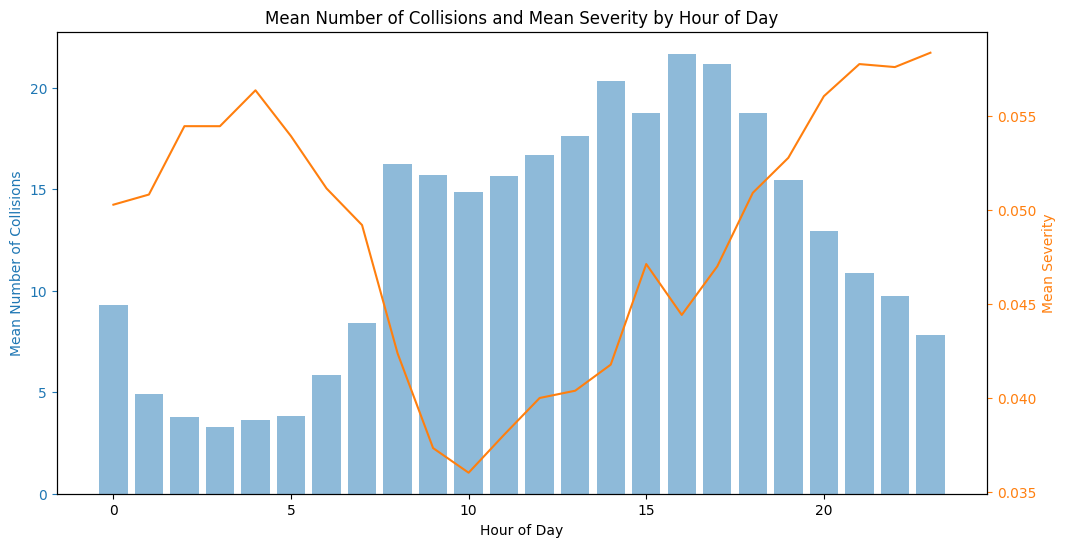

In [4]:
import matplotlib.pyplot as plt

total_collisions_per_hour = df.groupby('HOUR OF DAY').size()

# Calculate the number of unique days
# Replace 'DATE' with your date column
num_days = df['CRASH DATE'].dt.date.nunique()

# Calculate the mean collisions per hour
mean_collisions_per_hour = total_collisions_per_hour / num_days

# Find mean severity by hour of day
mean_severity_by_hour = df.groupby('HOUR OF DAY')['SEVERITY'].mean()

# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(mean_collisions_per_hour.index, mean_collisions_per_hour.values, color='C0', alpha=0.5)

ax1.set_ylabel('Mean Number of Collisions', color='C0')
ax1.tick_params('y', colors='C0')

ax2 = ax1.twinx()
ax2.plot(mean_severity_by_hour.index, mean_severity_by_hour.values, color='C1')
ax2.set_ylabel('Mean Severity', color='C1')
ax2.tick_params('y', colors='C1')

ax1.set_title('Mean Number of Collisions and Mean Severity by Hour of Day')
ax1.set_xlabel('Hour of Day')

# Display the chart
plt.show()

### Create a chart showing the mean number of collisions and mean severity by day of week.

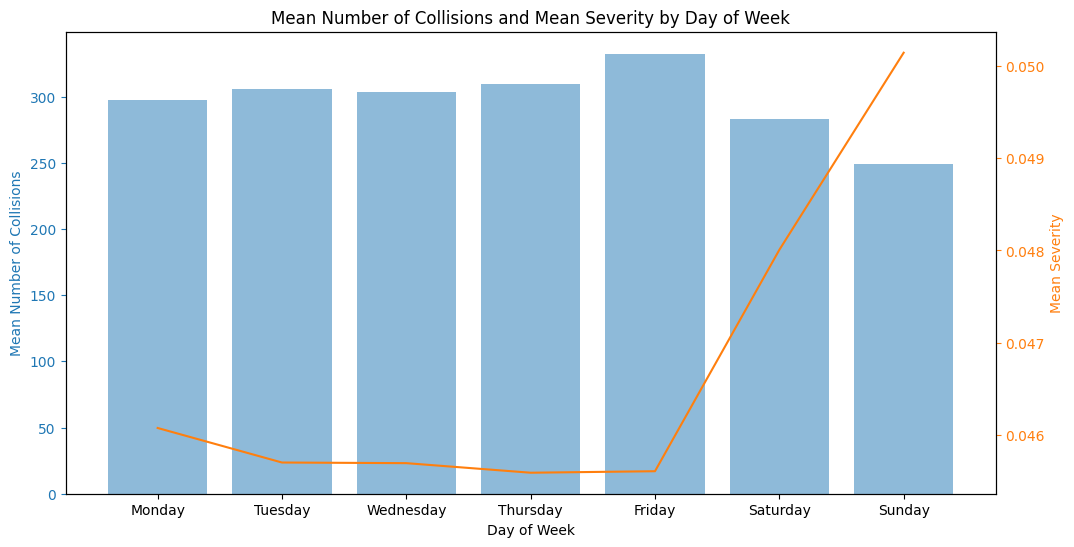

In [5]:
total_collisions_per_day = df.groupby('DAY OF WEEK').size()

# Get amount of unique days for each day of week
num_days_per_day = df.groupby('DAY OF WEEK')['CRASH DATE'].nunique()

# Find mean severity by day of week
mean_severity_by_day = df.groupby('DAY OF WEEK')['SEVERITY'].mean()

# Calculate the mean collisions per day
mean_collisions_per_day = total_collisions_per_day / num_days_per_day

# Sort by day of week
mean_collisions_per_day = mean_collisions_per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
mean_severity_by_day = mean_severity_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(mean_collisions_per_day.index, mean_collisions_per_day.values, color='C0', alpha=0.5)

ax1.set_ylabel('Mean Number of Collisions', color='C0')
ax1.tick_params('y', colors='C0')

ax2 = ax1.twinx()
ax2.plot(mean_severity_by_day.index, mean_severity_by_day.values, color='C1')
ax2.set_ylabel('Mean Severity', color='C1')
ax2.tick_params('y', colors='C1')

ax1.set_title('Mean Number of Collisions and Mean Severity by Day of Week')
ax1.set_xlabel('Day of Week')

# Display the chart
plt.show()

### Create a chart showing the mean number of collisions and mean severity by month.

/tmp/ipykernel_27913/623291070.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(mean_collisions_per_month.index, rotation=90)


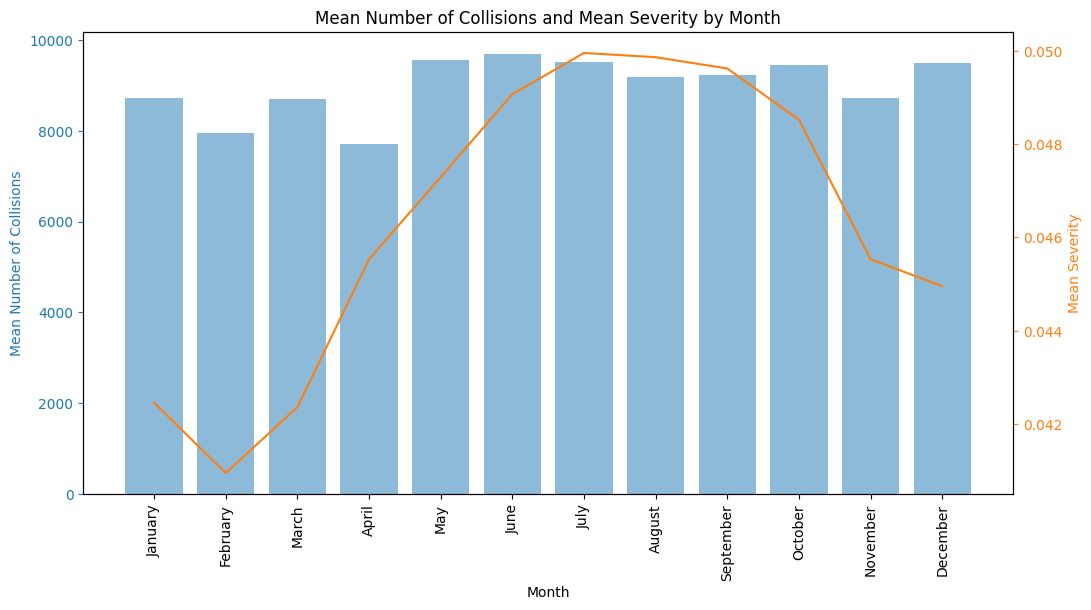

In [6]:
total_collisions_per_month = df.groupby('MONTH').size()

# Get number of years when each month occurs
num_years_per_month = df.groupby('MONTH')['CRASH DATE'].apply(lambda x: x.dt.year.nunique())

# Find mean severity by month
mean_severity_by_month = df.groupby('MONTH')['SEVERITY'].mean()

# Calculate the mean collisions per month
mean_collisions_per_month = total_collisions_per_month / num_years_per_month

# Sort by month
mean_collisions_per_month = mean_collisions_per_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
mean_severity_by_month = mean_severity_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(mean_collisions_per_month.index, mean_collisions_per_month.values, color='C0', alpha=0.5)

ax1.set_ylabel('Mean Number of Collisions', color='C0')
ax1.tick_params('y', colors='C0')

ax2 = ax1.twinx()
ax2.plot(mean_severity_by_month.index, mean_severity_by_month.values, color='C1')
ax2.set_ylabel('Mean Severity', color='C1')
ax2.tick_params('y', colors='C1')

ax1.set_title('Mean Number of Collisions and Mean Severity by Month')
ax1.set_xlabel('Month')

# Rotate x-axis labels
ax1.set_xticklabels(mean_collisions_per_month.index, rotation=90)

# Display the chart
plt.show()

## Create a chart showing the mean severity by vehicle type.

/tmp/ipykernel_27913/1676542811.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mean_severity_by_vehicle_type.index, rotation=90)


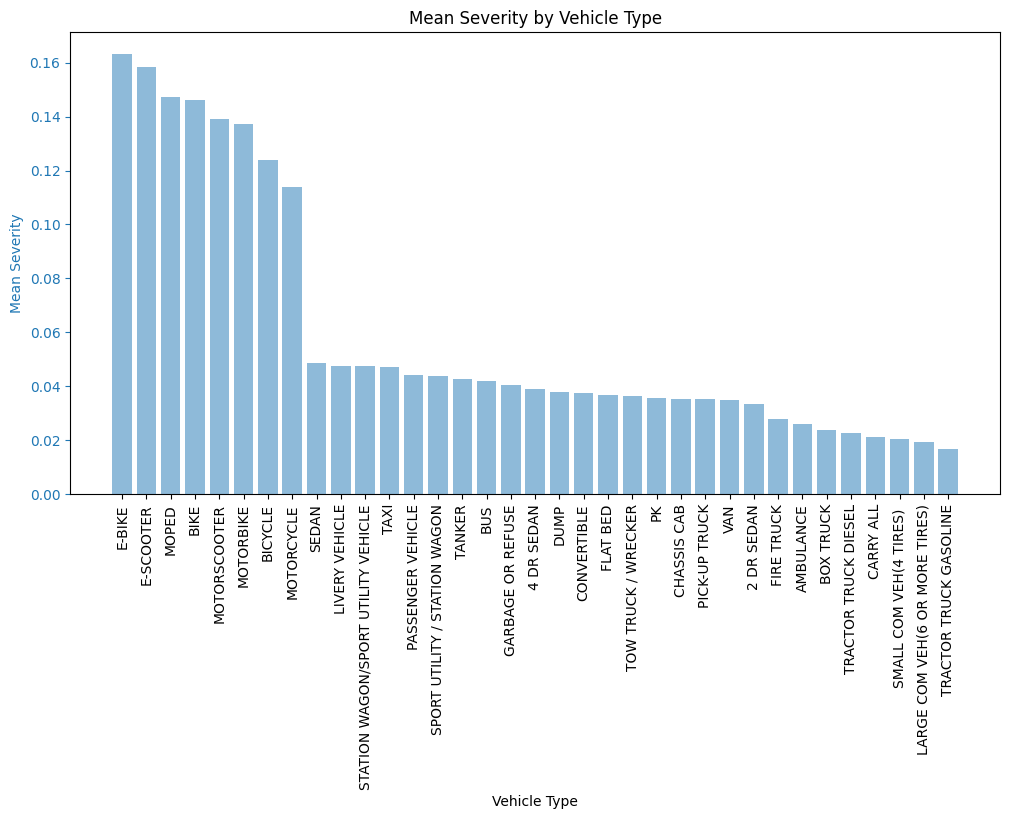

In [7]:
# Find mean severity by vehicle type
mean_severity_by_vehicle_type = df.groupby('VEHICLE TYPE CODE 1')['SEVERITY'].mean()

# Sort by mean severity
mean_severity_by_vehicle_type = mean_severity_by_vehicle_type.sort_values(ascending=False)

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(mean_severity_by_vehicle_type.index, mean_severity_by_vehicle_type.values, color='C0', alpha=0.5)

ax.set_ylabel('Mean Severity', color='C0')
ax.tick_params('y', colors='C0')

ax.set_title('Mean Severity by Vehicle Type')
ax.set_xlabel('Vehicle Type')

# Rotate x-axis labels
ax.set_xticklabels(mean_severity_by_vehicle_type.index, rotation=90)

# Display the chart
plt.show()

## Create a chart showing the mean amount of deaths by vehicle type.

/tmp/ipykernel_27913/3604821108.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mean_deaths_by_vehicle_type.index, rotation=90)


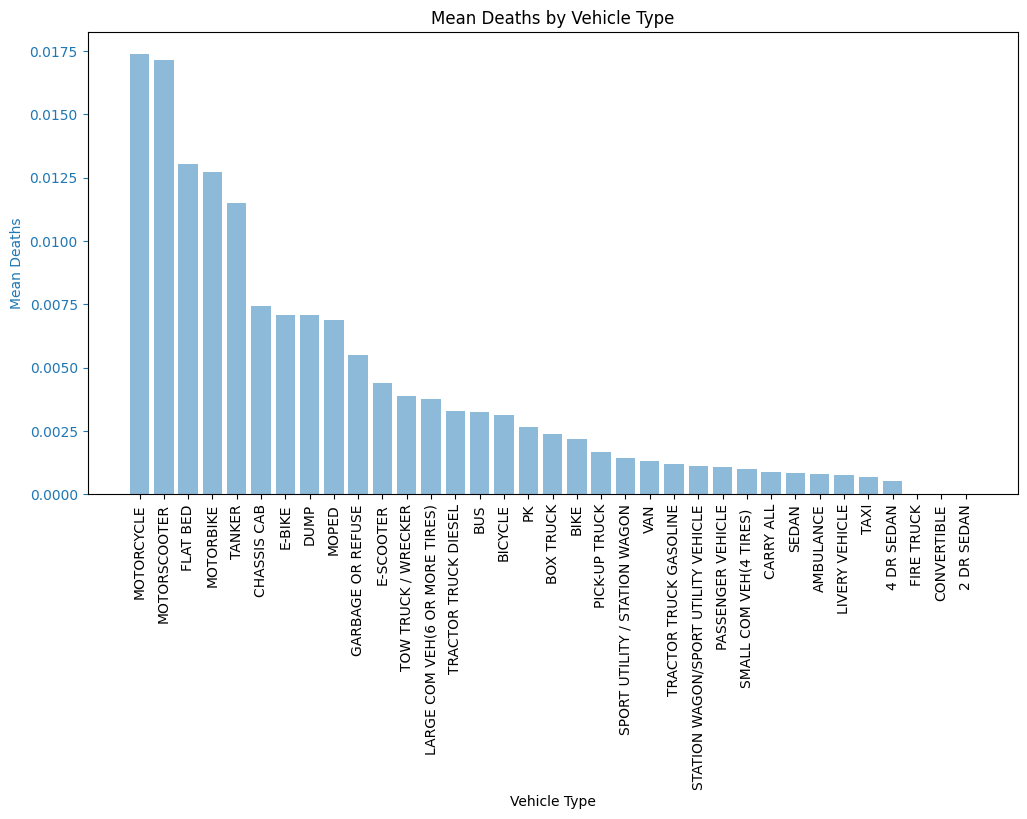

In [8]:
# Find mean deaths by vehicle type
mean_deaths_by_vehicle_type = df.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS KILLED'].mean()

# Sort by mean deaths
mean_deaths_by_vehicle_type = mean_deaths_by_vehicle_type.sort_values(ascending=False)

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(mean_deaths_by_vehicle_type.index, mean_deaths_by_vehicle_type.values, color='C0', alpha=0.5)

ax.set_ylabel('Mean Deaths', color='C0')
ax.tick_params('y', colors='C0')

ax.set_title('Mean Deaths by Vehicle Type')
ax.set_xlabel('Vehicle Type')

# Rotate x-axis labels
ax.set_xticklabels(mean_deaths_by_vehicle_type.index, rotation=90)

# Display the chart
plt.show()

## Create a chart showing the mean amount of injuries by vehicle type.

/tmp/ipykernel_27913/1512783914.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mean_injuries_by_vehicle_type.index, rotation=90)


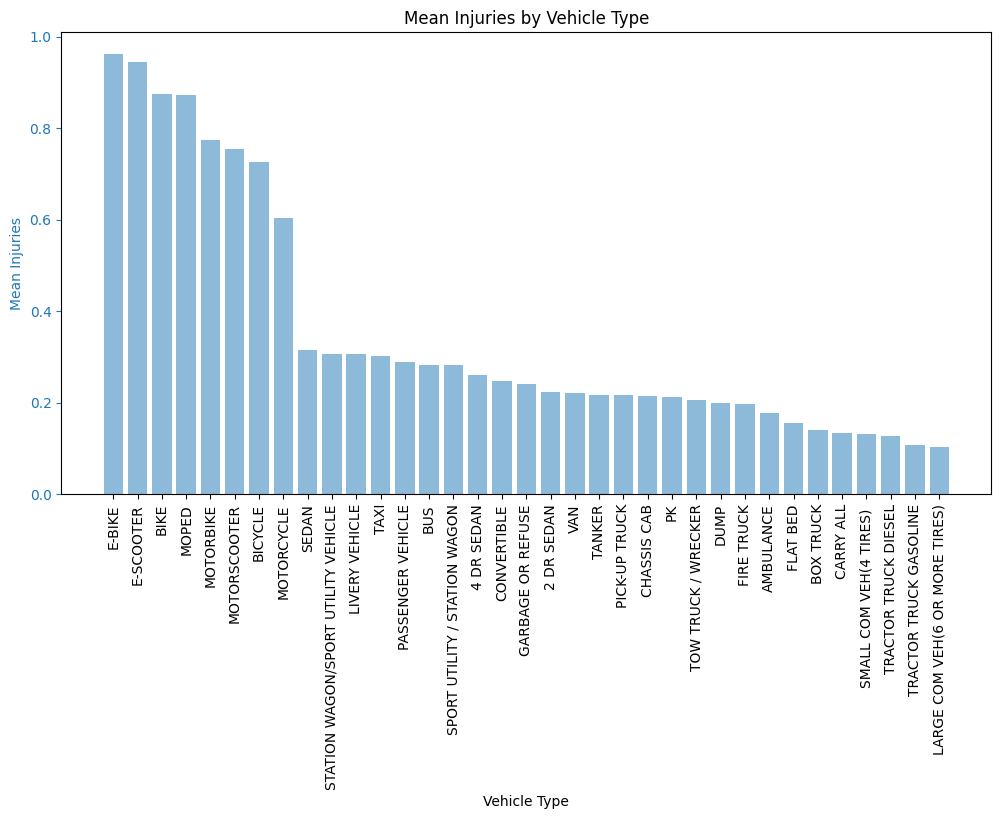

In [9]:
# Find mean injuries by vehicle type
mean_injuries_by_vehicle_type = df.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS INJURED'].mean()

# Sort by mean injuries
mean_injuries_by_vehicle_type = mean_injuries_by_vehicle_type.sort_values(ascending=False)

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(mean_injuries_by_vehicle_type.index, mean_injuries_by_vehicle_type.values, color='C0', alpha=0.5)

ax.set_ylabel('Mean Injuries', color='C0')
ax.tick_params('y', colors='C0')

ax.set_title('Mean Injuries by Vehicle Type')
ax.set_xlabel('Vehicle Type')

# Rotate x-axis labels
ax.set_xticklabels(mean_injuries_by_vehicle_type.index, rotation=90)

# Display the chart
plt.show()

## INJURIES MODEL

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

df_majority = df[df['NUMBER OF PERSONS INJURED'] == 0]
df_minority = df[df['NUMBER OF PERSONS INJURED'] != 0]
df_majority_undersampled = df_majority.sample(len(df_minority))
dfs = pd.concat([df_majority_undersampled, df_minority]).sample(n=10000, random_state=23)


print("sampled")

model_df = dfs[['ZIP CODE', 'HOUR OF DAY', 'DAY OF WEEK', 'SEASON', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'NUMBER OF PERSONS INJURED']].copy()
model_df.fillna('None', inplace=True)

model_df["INJURY"] = model_df['NUMBER OF PERSONS INJURED'] > 0

df_encoded = pd.get_dummies(model_df)

X = df_encoded.drop(columns=['INJURY', 'NUMBER OF PERSONS INJURED'])
y = df_encoded['INJURY']

print("encoded")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sampled
encoded


In [11]:
from sklearn.linear_model import Ridge

# Creating the model
model = Ridge(alpha=.5)

# Fitting the model
model.fit(X_train, y_train)
print("model fit")

# Making predictions
y_pred = model.predict(X_test)

coefficients = model.coef_
feature_coefficients = zip(X_train.columns, coefficients)
sorted_features = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)
top_10_features = sorted_features[:10]

print("predicted")


model fit
predicted


Text(0.5, 1.0, 'Precision-Recall Curve')

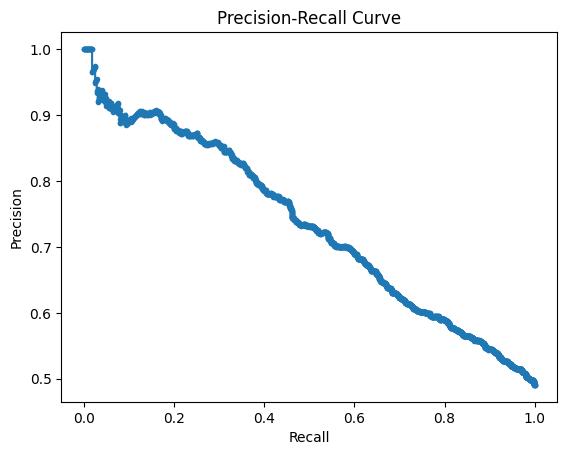

In [12]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

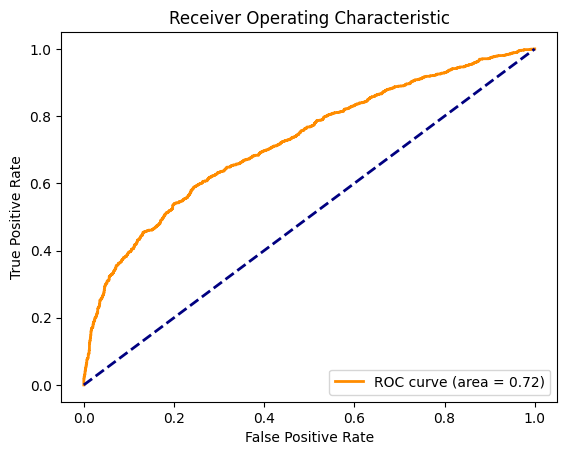

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [14]:
for feature, coef in top_10_features:
    print(f"{feature}: {coef}")

VEHICLE TYPE CODE 2_E-BIKE: 0.6164563167061623
ZIP CODE_10281: -0.5951487705666688
VEHICLE TYPE CODE 2_BIKE: 0.5652441560402008
VEHICLE TYPE CODE 1_BICYCLE: 0.5312910850738246
VEHICLE TYPE CODE 2_E-SCOOTER: 0.5265791407995858
VEHICLE TYPE CODE 2_MOTORBIKE: 0.5143442553120389
VEHICLE TYPE CODE 3_AMBULANCE: -0.510612637789728
VEHICLE TYPE CODE 2_MOPED: 0.5030039345424612
ZIP CODE_10271.0: 0.48734445639737556
ZIP CODE_10302: 0.4650056994555094


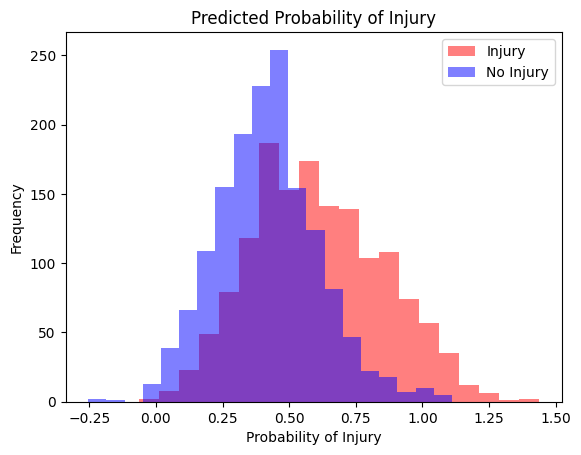

In [15]:
pred_with_lethality = y_pred[y_test == True]
pred_without_lethality = y_pred[y_test == False]

# Plotting
plt.hist(pred_with_lethality, bins=20, alpha=0.5, color='red', label='Injury')
plt.hist(pred_without_lethality, bins=20, alpha=0.5, color='blue', label='No Injury')

plt.xlabel('Probability of Injury')
plt.ylabel('Frequency')
plt.title('Predicted Probability of Injury')
plt.legend()